In [1]:
import pandas as pd
import numpy as np
import json
import time
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.applications.xception import Xception
from keras.layers import Flatten
from keras.layers import Dense

In [2]:
path = '/Users/rpindale/Desktop/Yummly28K/metadata27638/'

def read_meta_into_df(path, n_files):
    recipe_info = pd.DataFrame({'id':[], 'title':[], 'time_to_cook_(seconds)':[], 'ingredients':[], 'cuisine':[], 'course':[]})
    for meta_num in range(1,n_files+1):
        num_of_digits = len(str(meta_num))
        num_of_zeros_in_fname = 5 - num_of_digits
        final_path = path + 'meta' + str(0)*num_of_zeros_in_fname + str(meta_num) + '.json' #makes path for the json file for that recipe
        f = open(final_path)
        temp = json.load(f)
        id_ = str(0)*num_of_zeros_in_fname + str(meta_num)
        title = temp['name']
        time = temp['totalTimeInSeconds']
        ingredients = np.array(temp['ingredientLines'], dtype='object')
        course = temp['attributes']['course'][0] #returns as list, so take first element. Idk if there are multiple labels for some.
        cuisine = temp['attributes']['cuisine'][0]
        new_df = pd.DataFrame({'id':id_, 'title':title, 'time_to_cook_(seconds)':time, 'ingredients':[ingredients], 'cuisine':cuisine, 'course':course})
        recipe_info = recipe_info.append(new_df)
    return(recipe_info)

        

        

In [3]:
#start = time.time()
#temp = read_meta_into_df(path, 1)
#end = time.time()
#print(end-start)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/rpindale/Desktop/Yummly28K/metadata27638/meta00001.json'

In [4]:
#temp.to_csv('recipe_info.csv') #save this to a .csv so I do not have to do this again!

In [3]:
temp = pd.read_csv('recipe_info.csv')

In [5]:
temp.head(10)

,Unnamed: 0,id,title,time_to_cook_(seconds),ingredients,cuisine,course
0,0,1,Mushroom Risotto,1800.0,"['2 cups Baby Bella mushrooms, sliced' '2 cups...",Italian,Side Dishes
1,0,2,Filipino BBQ Pork Skewers,2400.0,"['2.5 lb pork country style ribs, all fat trim...",Barbecue,Main Dishes
2,0,3,Mushroom and Roasted Garlic Risotto,5100.0,['2 whole garlic heads'\n '2 tablespoons plus ...,Italian,Main Dishes
3,0,4,Gratin Dauphinois (Scalloped Potatoes with Che...,3300.0,"['1 garlic clove, halved' 'Cooking spray'\n '6...",French,Side Dishes
4,0,5,Delicious Grilled Hamburgers,900.0,['1 pound lean ground beef' '1 tablespoon Worc...,Barbecue,Main Dishes
5,0,6,Hickory-Smoked Bourbon Turkey,NaN,"['1 (11-pound) whole turkey, thawed' '2 cups m...",American,Main Dishes
6,0,7,Marinated Beef Tenderloin,12600.0,['1 beef tenderloin (3 pounds; preferably cent...,American,Main Dishes
7,0,8,Cherry Tortoni,NaN,"['2/3 cup sugar, divided'\n '1 tablespoon amar...",Italian,Desserts
8,0,9,Crock-Pot Italian Turkey Meatballs and Homemad...,1200.0,['½ cup whole wheat bread crumbs made from ¾ o...,Italian,Main Dishes
9,0,10,Chicken Salad with Wild Rice,NaN,['1/2 cup uncooked wild rice' '2 cups chopped ...,American,Salads


In [6]:
temp.iloc[0]

Unnamed: 0                                                                0
id                                                                        1
title                                                      Mushroom Risotto
time_to_cook_(seconds)                                                 1800
ingredients               ['2 cups Baby Bella mushrooms, sliced' '2 cups...
cuisine                                                             Italian
course                                                          Side Dishes
Name: 0, dtype: object

In [7]:
temp.cuisine.value_counts()

American                11729
Italian                  4571
Mexican                  3394
Asian                    1951
French                   1562
Indian                   1457
Kid-Friendly              962
Southwestern              600
Thai                      347
Barbecue                  338
Chinese                   266
Southern & Soul Food      151
Greek                      80
Mediterranean              72
Spanish                    58
Cuban                      31
Cajun & Creole             18
Moroccan                   11
Japanese                   10
Irish                       9
English                     6
Hawaiian                    5
German                      4
Hungarian                   3
Portuguese                  2
Vietnamese                  1
Name: cuisine, dtype: int64

In [8]:
temp.course.value_counts()

Main Dishes              13665
Desserts                  3204
Salads                    2406
Side Dishes               2147
Soups                     1804
Appetizers                1513
Condiments and Sauces      830
Lunch and Snacks           649
Breakfast and Brunch       587
Breads                     467
Beverages                  250
Cocktails                   99
Afternoon Tea               17
Name: course, dtype: int64

In [9]:
keys = temp['cuisine'].unique()
vals = range(26)
dict_ = {}
for i in range(len(keys)):
    dict_[temp['cuisine'].unique()[i]] = i
dict_

{'Italian': 0,
 'Barbecue': 1,
 'French': 2,
 'American': 3,
 'Asian': 4,
 'Kid-Friendly': 5,
 'Southwestern': 6,
 'Mexican': 7,
 'Indian': 8,
 'Southern & Soul Food': 9,
 'Thai': 10,
 'Japanese': 11,
 'Chinese': 12,
 'Spanish': 13,
 'Mediterranean': 14,
 'Cajun & Creole': 15,
 'Cuban': 16,
 'Greek': 17,
 'German': 18,
 'Moroccan': 19,
 'Irish': 20,
 'Hungarian': 21,
 'Vietnamese': 22,
 'English': 23,
 'Portuguese': 24,
 'Hawaiian': 25}

In [6]:
temp.iloc[845]

Unnamed: 0                                                                0
id                                                                      846
title                                                          Eden’s Apple
time_to_cook_(seconds)                                                  600
ingredients               ['1.5 oz Apple- and Cinnamon-Infused Karlsson’...
cuisine                                                            American
course                                                            Beverages
Name: 845, dtype: object

In [11]:
directory = '/Users/rpindale/Desktop/Yummly28K'
labels = [dict_[label] for label in list(temp['cuisine'])] #list(temp['cuisine'])


training_images = tf.keras.utils.image_dataset_from_directory(directory = directory,
                                            labels = labels, 
                                            label_mode='int',
                                            batch_size = 32, 
                                            shuffle = False,
                                            seed = 314,
                                            subset='training', 
                                            validation_split=.2)

validation_images = tf.keras.utils.image_dataset_from_directory(directory = directory,
                                            labels = labels, 
                                            label_mode='int',
                                            batch_size = 32, 
                                            shuffle = False,
                                            seed = 314,
                                            subset='validation', 
                                            validation_split=.2)

Found 27638 files belonging to 2 classes.
Using 22111 files for training.
Found 27638 files belonging to 2 classes.
Using 5527 files for validation.


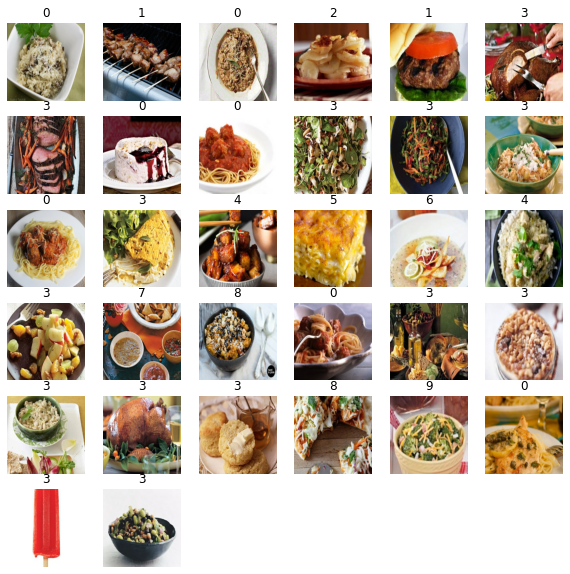

In [12]:
plt.figure(figsize=(10, 10))
class_names = list(temp.cuisine.unique())
for images, labels in training_images.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        #plt.title(str(labels[i].numpy())[2:-1])
        plt.title(str(labels[i].numpy()))
        plt.axis("off")

In [30]:
#subset = training_images.take(15)

In [18]:
import keras

model_simple = keras.models.Sequential([
    keras.layers.Conv2D(filters = 100, kernel_size=3, strides=1, activation="relu", padding="same",
                        input_shape=[256, 256, 3]),
    keras.layers.MaxPooling2D(3, strides=2, padding="valid"),
    keras.layers.Conv2D(150, kernel_size = 3, strides=1, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(3, strides=2, padding="valid"),
    keras.layers.Conv2D(50, kernel_size = 3, strides=1, activation="relu", padding="same"),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    #keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(26, activation="softmax")
])


model_simple.compile(loss="sparse_categorical_crossentropy", optimizer='adam',
              metrics=["accuracy"])
history = model_simple.fit(training_images, epochs=8, validation_data=validation_images)


Epoch 1/8
691/691 [==============================] - 6072s 9s/step - loss: 6.2891 - accuracy: 0.4142 - val_loss: 1.8708 - val_accuracy: 0.4292
Epoch 2/8
691/691 [==============================] - 6243s 9s/step - loss: 1.8915 - accuracy: 0.4228 - val_loss: 1.8725 - val_accuracy: 0.4286
Epoch 3/8
691/691 [==============================] - 6429s 9s/step - loss: 1.8846 - accuracy: 0.4239 - val_loss: 1.8716 - val_accuracy: 0.4292
Epoch 4/8
691/691 [==============================] - 5424s 8s/step - loss: 1.8809 - accuracy: 0.4251 - val_loss: 1.8716 - val_accuracy: 0.4284
Epoch 5/8
691/691 [==============================] - 4749s 7s/step - loss: 1.8780 - accuracy: 0.4260 - val_loss: 1.8850 - val_accuracy: 0.4274
Epoch 6/8
691/691 [==============================] - 4686s 7s/step - loss: 1.8766 - accuracy: 0.4276 - val_loss: 1.8840 - val_accuracy: 0.4277
Epoch 7/8
691/691 [==============================] - 4669s 7s/step - loss: 1.8702 - accuracy: 0.4298 - val_loss: 1.9200 - val_accuracy: 0.4279

In [20]:
model_simple.save('cuisine_im_mod.h5')

In [54]:
keras.layers.MaxPooling1D?

Init signature: keras.layers.MaxPooling1D(*args, **kwargs)
Docstring:     
Max pooling operation for 1D temporal data.

Downsamples the input representation by taking the maximum value over a
spatial window of size `pool_size`. The window is shifted by `strides`.  The
resulting output, when using the `"valid"` padding option, has a shape of:
`output_shape = (input_shape - pool_size + 1) / strides)`

The resulting output shape when using the `"same"` padding option is:
`output_shape = input_shape / strides`

For example, for `strides=1` and `padding="valid"`:

>>> x = tf.constant([1., 2., 3., 4., 5.])
>>> x = tf.reshape(x, [1, 5, 1])
>>> max_pool_1d = tf.keras.layers.MaxPooling1D(pool_size=2,
...    strides=1, padding='valid')
>>> max_pool_1d(x)
<tf.Tensor: shape=(1, 4, 1), dtype=float32, numpy=
array([[[2.],
        [3.],
        [4.],
        [5.]]], dtype=float32)>

For example, for `strides=2` and `padding="valid"`:

>>> x = tf.constant([1., 2., 3., 4., 5.])
>>> x = tf.reshape(x, [1

In [13]:


Xception_model = Xception(include_top=False, weights=None, input_shape=(256, 256, 3))#input_shape=(150, 150, 3))#, classes=18)

x = Xception_model.output #I ran into an issue with dimensionality. I used this link as a reference to solve it: https://stackoverflow.com/questions/66584693/keras-invalidargumenterror-incompatible-shapes-64-7-7-1-vs-64-1-when-try

x = keras.layers.MaxPooling2D(5, strides=2, padding="valid")(x)
x = Flatten()(x)
#x = tf.keras.layers.MaxPooling1D(5,1, padding="valid")(x)
#x = Dense(300, activation="relu")(x)
#x = Dense(len(temp.cuisine.unique()))(x)
#x = tf.keras.layers.Activation("softmax")(x)

model = tf.keras.Model(inputs = Xception_model.input, outputs = x)

model.compile(loss="sparse_categorical_crossentropy", optimizer='adam',
              metrics=["accuracy"])

model.summary()

#history = model.fit(subset, epochs=1, validation_data=validation_images)

NameError: name 'keras' is not defined

In [59]:
model.save('cuisine_im_mod.h5')

In [60]:
new_model = tf.keras.Model(model.inputs, model.layers[-1].output) 


In [61]:
new_model.set_weights(model.get_weights())

In [62]:
new_model.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 127, 127, 32) 864         input_7[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 127, 127, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 127, 127, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [63]:
training_images.take(1)

<TakeDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [64]:
new_temp=new_model.predict(training_images.take(1))

In [65]:
new_temp[0] - new_temp[8]

array([-0.00637805, -0.00645146,  0.00825999, ..., -0.002351  ,
       -0.00144211, -0.00205052], dtype=float32)